# Employee Salary Prediction: Linear Regression 

### Importing Packages/libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read DataFile/ CSV file 


In [5]:
sal_data = pd.read_csv ('Dataset09-Employee-salary-prediction.csv')
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Data Cleaning

### Number of Rows and columns:


In [6]:
sal_data.shape

(375, 6)

### List of Columns

In [7]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

### Rename Columns


In [8]:
sal_data.columns =['Age', 'Gender', 'Degree', 'Job_Title', 'Experience',
       'Salary']

### Column Datatype

In [9]:
sal_data.dtypes

Age           float64
Gender         object
Degree         object
Job_Title      object
Experience    float64
Salary        float64
dtype: object

### Information Of dataset

In [10]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         373 non-null    float64
 1   Gender      373 non-null    object 
 2   Degree      373 non-null    object 
 3   Job_Title   373 non-null    object 
 4   Experience  373 non-null    float64
 5   Salary      373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### Finding Duplicate records in data

In [11]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


### Dropping Duplicates data 

In [12]:
sal_data1 = sal_data.drop_duplicates(keep ='first')

In [13]:
sal_data.isnull().sum()

Age           2
Gender        2
Degree        2
Job_Title     2
Experience    2
Salary        2
dtype: int64

In [14]:
sal_data1.dropna(how ='any', inplace = True)

C:\Users\PRIYA LANDGE\AppData\Local\Temp\ipykernel_22216\1161033418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how ='any', inplace = True)


In [15]:
sal_data1.shape

(324, 6)

In [16]:
sal_data1.describe()

,Age,Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [17]:
corr = sal_data1[['Age','Experience','Salary']].corr()
corr

,Age,Experience,Salary
Age,1.000000,0.979192,0.916543
Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


# Data Visualisation

<Axes: >

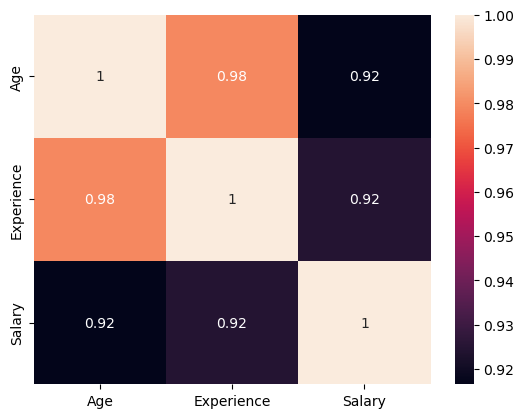

In [18]:
sns.heatmap(corr,annot =True)

In [19]:
sal_data1['Degree'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Degree, dtype: int64

<Axes: >

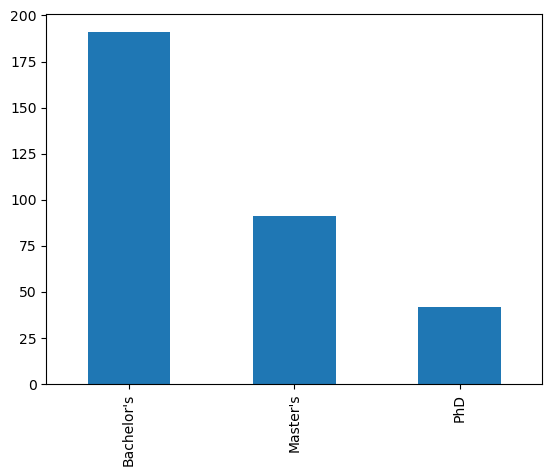

In [20]:
sal_data1['Degree'].value_counts().plot(kind ='bar')

In [21]:
sal_data1['Job_Title'].value_counts()

Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job_Title, Length: 174, dtype: int64

<Axes: >

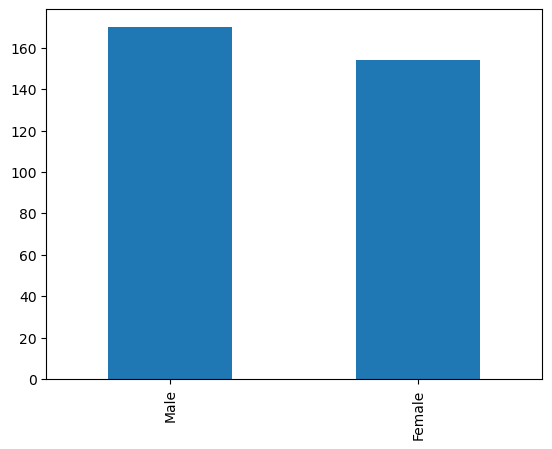

In [22]:
sal_data1['Gender'].value_counts().plot(kind = "bar")

In [23]:
sal_data1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Numerical Variables -Plot Histogram

<Axes: ylabel='Frequency'>

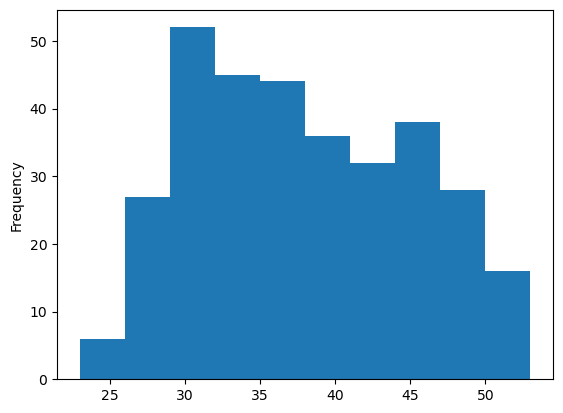

In [24]:
sal_data1.Age.plot(kind ='hist')

<Axes: >

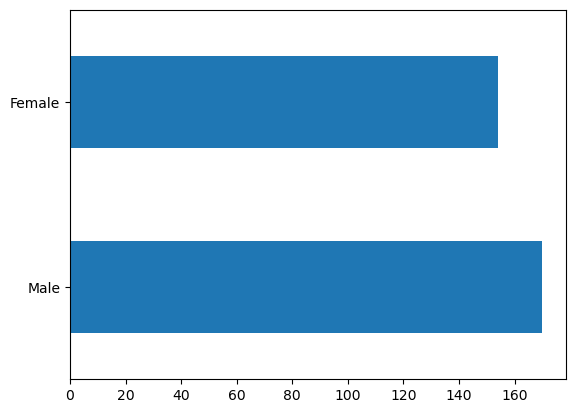

In [25]:
sal_data1['Gender'].value_counts().plot(kind ="barh")

<Axes: >

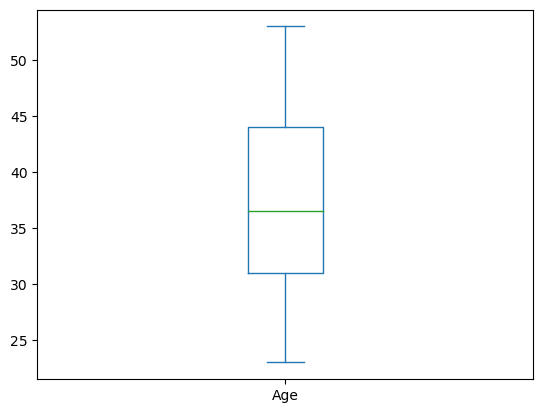

In [26]:
sal_data1.Age.plot(kind ='box')

# Feature Engineering

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder =LabelEncoder ()

In [29]:
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])

C:\Users\PRIYA LANDGE\AppData\Local\Temp\ipykernel_22216\1017469824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])


In [33]:
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])

C:\Users\PRIYA LANDGE\AppData\Local\Temp\ipykernel_22216\446779904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])


In [35]:
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

C:\Users\PRIYA LANDGE\AppData\Local\Temp\ipykernel_22216\840262182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])


### Data after Label Encoding

In [36]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [42]:
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1["Experience_scaled"] = std_scaler.fit_transform(sal_data1[[ 'Experience']])

C:\Users\PRIYA LANDGE\AppData\Local\Temp\ipykernel_22216\1919508101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
C:\Users\PRIYA LANDGE\AppData\Local\Temp\ipykernel_22216\1919508101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1["Experience_scaled"] = std_scaler.fit_transform(sal_data1[[ 'Experience']])


### Data After scaling


In [44]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


### Dependent and inpendent Features

In [50]:
X = sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_scaled']]
Y = sal_data1['Salary']

In [51]:
X.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


### Spilitting data into training and testing 

In [54]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [63]:
x_train.shape #80 percent of the data 

(259, 5)

In [64]:
x_test.shape # 20 percent of the data

(65, 5)

### Model Development

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
Linear_regression_model = LinearRegression()

### Model Training

In [65]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

### Model prediction: 

In [68]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [73]:
df = pd.DataFrame({'y_Actual': y_test , "y_Predicted": y_pred_lr})
df['Error'] = df ['y_Actual']- df['y_Predicted']
df['abs_error'] = abs (df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


In [75]:
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

10570.78640113618

# Model evalutation

In [77]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Model Accuracy

In [78]:
r2_score(y_test , y_pred_lr)

0.8911231066517088

In [84]:
print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100 } %')

Accuracy of the model = 89.11 %


### Mean Absolute error

In [85]:
round (mean_absolute_error(y_test, y_pred_lr),2)

10570.79

In [87]:
print (f'Accuracy of the model = {round (mean_absolute_error(y_test, y_pred_lr),2)}')

Accuracy of the model = 10570.79


### Mean Squared Error

In [89]:
mse = round (mean_squared_error(y_test, y_pred_lr),2)
mse

205754135.72

In [91]:
print (f"Mean Squared Error = {round (mean_absolute_error(y_test, y_pred_lr),2)}" )

Mean Squared Error = 10570.79


### Root Mean Squared Error 

In [92]:
print (f' Root Mean Squared Error (RMSE) = ', mse**(0.5))

 Root Mean Squared Error (RMSE) =  14344.132449193294


### Coefficients

In [93]:
Linear_regression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

### Intercept

In [94]:
Linear_regression_model.intercept_

86001.49320553182

In [95]:
Customise Prediction

SyntaxError: invalid syntax (3417195249.py, line 1)

In [96]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [100]:
Age1 = std_scaler.transform([[49]])
Age = 5.86448677                #scaler value as we have trained the data to tranform into scaler values
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience = 0.74415815
#find salary?

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Public\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
std_scaler.transform([[15]])[0][0]

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.7441581452572275

In [103]:
Emp_Salary = Linear_regression_model.predict([[Age, Gender, Degree, Job_Title, Experience]])
Emp_Salary

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249925.15061728])

In [105]:
print ("Salary of the employee with the given data =", Emp_Salary [0])

Salary of the employee with the given data = 249925.1506172758
